# Calcium data exploration

In [1]:
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
import src.data.prepare as prep
#import src.data.validator as val
import src.data.seizures as seiz
import src.visualization.seizures as seiz_vis

In [2]:
#plt.rcParams['figure.figsize'] = (20.0, 10.0)         
data_df = prep.load_data('2016-10-13T1513', 'filtered', load_seizures=True)
raw = data_df['data']
real_seizures = data_df['real_seizures_df']

In [3]:
print('Length:',raw.index[-1]-raw.index[0])

Length: 0 days 00:25:34.999500


In [4]:
raw['seizure'] = seiz.markSeizures(raw, real_seizures)
#raw['seiz_bef'] = raw.seizure.shift(fill_value=0)

In [5]:
raw[raw.seizure==1].head()
raw['seizure'].head()

00:04:35           0.0
00:04:35.000500    0.0
00:04:35.001000    0.0
00:04:35.001500    0.0
00:04:35.002000    0.0
Name: seizure, dtype: float64

In [6]:
seizures_df = real_seizures#
seizures_df.info()
seizures_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   start   68 non-null     timedelta64[ns]
 1   end     68 non-null     timedelta64[ns]
 2   length  68 non-null     timedelta64[ns]
dtypes: timedelta64[ns](3)
memory usage: 1.7 KB


start             end          length
s_nr                                                
0    00:04:41.001000 00:04:52.345000 00:00:11.344000
1    00:05:01.399000 00:05:13.409500 00:00:12.010500
2    00:05:23.175000 00:05:30.573000 00:00:07.398000
3    00:06:06.477000 00:06:19.516499 00:00:13.039499
4    00:06:25.462000 00:06:30.469000 00:00:05.007000

In [7]:
seiz.create_seizures_df_from_series(raw['seizure'], raw).iloc[67]['data'].describe()

count    12962.000000
mean         0.143591
std          0.002610
min          0.139268
25%          0.141615
50%          0.143079
75%          0.145057
max          0.153219
Name: yvalue, dtype: float64

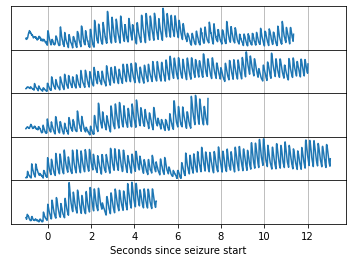

In [8]:
seiz_vis.plot_all_seizures_stacked(seizures_df.iloc[:5], raw['yvalue'], title=None)#'Some seizures from the 2016-10-13T1513 measurement'

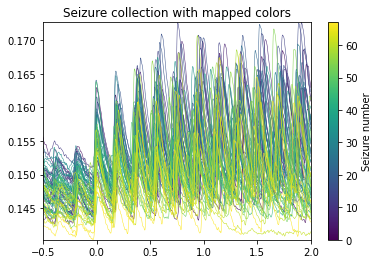

In [9]:
seiz_vis.plot_all_seizures(seizures_df, raw['yvalue'], title='Seizure collection with mapped colors', rescale=False)

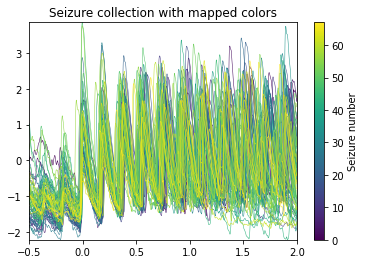

In [10]:
seiz_vis.plot_all_seizures(seizures_df, raw['yvalue'], title='Seizure collection with mapped colors', rescale=True)

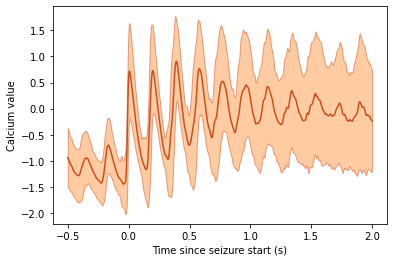

In [11]:
seiz_vis.plot_average_seizure(seizures_df, raw['yvalue'], rescale=True)

#np.savetxt('2016-10-13T1513_mean.dat', s_mean)

(1e-06, 10000.0)

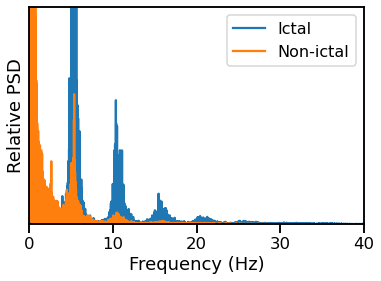

In [12]:
sns.set_context('talk')
#plt.figure(figsize=(20,10))
seiz_vis.plot_powerspectrum_ictal_nonictal(seizures_df, raw['yvalue'])
plt.xlim(0,40)
#plt.yscale('log')
plt.ylim(10e-7, 10000)

(1e-06, 100000.0)

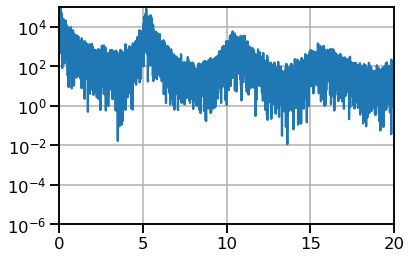

In [13]:
seiz_vis.plot_powerspectrum_ictal(seizures_df, raw['yvalue'])
plt.xlim(0,20)
plt.yscale('log')
plt.ylim(10e-7, 10e4)

(0.01, 100000.0)

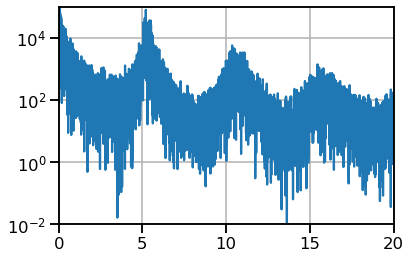

In [14]:
seiz_vis.plot_powerspectrum_ictal(seizures_df, raw['yvalue'])
plt.xlim(0,20)
plt.yscale('log')
plt.ylim(10e-3, 10e4)

(0.01, 100000.0)

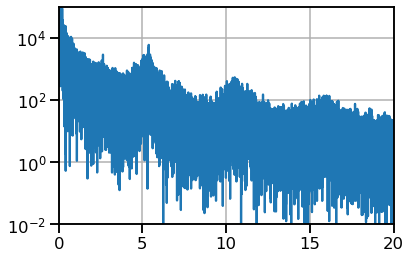

In [15]:
seiz_vis.plot_powerspectrum_nonictal(seizures_df, raw['yvalue'])
plt.xlim(0,20)
plt.yscale('log')
plt.ylim(10e-3, 10e4)

In [16]:
seizure = raw[raw.seizure==1]
normal = raw[raw.seizure==0]

                   yvalue  seizure
00:08:20.000500  0.148388      0.0
00:08:20.001000  0.148382      0.0
00:08:20.001500  0.148381      0.0
00:08:20.002000  0.148383      0.0
00:08:20.002500  0.148389      0.0


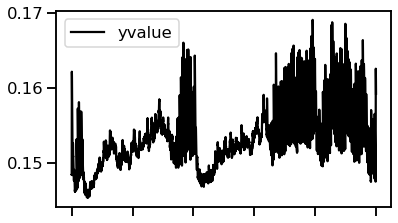

In [17]:
raw_part = raw[(raw.index > pd.to_timedelta('500s')) & (raw.index < pd.to_timedelta('550s'))]
print(raw_part.head())
ax = raw_part.plot(y='yvalue', color='black')
#raw_part.plot(x='second', y='filtered', color='red', ax=ax)
#TODO plot raw and filtered together

